# Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Data

In [46]:
data = pd.read_csv('walmart_product_review.tsv', sep='\t')

# Data Cleaning

In [47]:
df = data.copy()
df.head(1)

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a


In [48]:
df.shape

(5000, 32)

In [49]:
df.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [50]:
columns_to_drop = df.columns[df.isnull().sum() >= df.shape[0] * 0.9]
columns_to_drop

Index(['Dataset Origin', 'Product Barcode', 'Product Brand Source',
       'Product Brand Normalised Source', 'Product Name Source', 'Match Rank',
       'Match Score', 'Match Type', 'Sku', 'Upc', 'Product Model Number',
       'Product Contents', 'Bsr'],
      dtype='object')

In [51]:
df = df.drop(columns=columns_to_drop)
df.head(1)

,Uniq Id,Crawl Timestamp,Product Id,Product Company Type Source,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Available Inventory,Product Image Url,Product Tags,Product Rating,Product Reviews Count,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,2e17bf4acecdece67fc00f07ad62c910,Competitor,walmart.com,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://www.walmart.com/ip/OPI-Infinite-Shine-...,US,NaN,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,81350af1be98d3753cf964709f0c766a


In [52]:
df.isnull().sum()

Uniq Id                           0
Crawl Timestamp                   0
Product Id                        0
Product Company Type Source       0
Retailer                          0
Product Category                 10
Product Brand                    13
Product Name                      0
Product Price                    42
Product Url                       0
Market                            0
Product Description            1127
Product Currency                  0
Product Available Inventory       0
Product Image Url                 0
Product Tags                      0
Product Rating                 2806
Product Reviews Count          1654
Joining Key                       0
dtype: int64

In [53]:
df['Crawl Timestamp']

0       2020-09-24 03:21:12 +0000
1       2020-10-30 14:04:08 +0000
2       2020-08-06 05:51:47 +0000
3       2020-07-15 11:22:04 +0000
4       2020-11-26T12:27:20+00:00
                  ...            
4995    2020-07-21 19:00:03 +0000
4996    2020-07-01 05:45:18 +0000
4997    2020-12-01T02:02:32+00:00
4998    2020-10-20 21:29:05 +0000
4999    2020-11-12T10:54:32+00:00
Name: Crawl Timestamp, Length: 5000, dtype: object

In [54]:
df['Product Company Type Source'].value_counts()

Product Company Type Source
Competitor    4861
Unilever       139
Name: count, dtype: int64

In [55]:
df['Retailer'].value_counts()

Retailer
walmart.com    5000
Name: count, dtype: int64

In [56]:
df['Market'].value_counts()

Market
US    5000
Name: count, dtype: int64

In [57]:
df['Product Currency'].value_counts()

Product Currency
USD    5000
Name: count, dtype: int64

In [58]:
df['Product Available Inventory'].value_counts()

Product Available Inventory
111111111    5000
Name: count, dtype: int64

In [59]:
df['Joining Key']

0       81350af1be98d3753cf964709f0c766a
1       0353e63907dc0de0c734db4690300057
2       b6985c8e94815fbca2319dbb8bf228af
3       85b70fded09186f00467cea2f935b779
4       41c870871328e97da6fb036bb7d4b2da
                      ...               
4995    30ffe1476e6289c474ab1c08e503be4b
4996    dad7562b7fb37c2f2eaf07644f0a8702
4997    acf460a46f2b2967ee0b0a9ae3eff7dc
4998    cd97ac9b2e21a81ea23e4bea58096df7
4999    69870b86f5ab30b15b025ca7a3489e39
Name: Joining Key, Length: 5000, dtype: object

In [60]:
df.drop(columns=['Crawl Timestamp', 'Product Company Type Source', 'Retailer', 'Market', 'Product Currency', 'Product Available Inventory', 'Joining Key'], inplace=True)
df.head(2)

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Url,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://www.walmart.com/ip/OPI-Infinite-Shine-...,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://www.walmart.com/ip/Nice-n-Easy-Permane...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN


In [61]:
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Price': 'Price',
    'Product Url': 'URL',
    'Product Description': 'Description',
    'Product Image Url': 'AllImagesURLs',
    'Product Tags': 'Tags',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount'
}
df.rename(columns=column_name_mapping, inplace=True)

In [62]:
df.head(2)

,ID,ProdID,Category,Brand,Name,Price,URL,Description,AllImagesURLs,Tags,Rating,ReviewCount
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://www.walmart.com/ip/OPI-Infinite-Shine-...,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://www.walmart.com/ip/Nice-n-Easy-Permane...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN


In [63]:
df.isnull().sum()

ID                  0
ProdID              0
Category           10
Brand              13
Name                0
Price              42
URL                 0
Description      1127
AllImagesURLs       0
Tags                0
Rating           2806
ReviewCount      1654
dtype: int64

In [64]:
fill_values = {
    'Rating': 0,
    'ReviewCount': 0,
    'Category': '',
    'Brand': '',
    'Description': ''
}

df.fillna(fill_values, inplace=True)
df.isnull().sum()

ID                0
ProdID            0
Category          0
Brand             0
Name              0
Price            42
URL               0
Description       0
AllImagesURLs     0
Tags              0
Rating            0
ReviewCount       0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df.columns

Index(['ID', 'ProdID', 'Category', 'Brand', 'Name', 'Price', 'URL',
       'Description', 'AllImagesURLs', 'Tags', 'Rating', 'ReviewCount'],
      dtype='object')

# EDA

In [67]:
print('Num of Unique Products: ', df['ProdID'].nunique())
print('Num of Brands: ', df['Brand'].nunique())

Num of Unique Products:  4802
Num of Brands:  1601


In [68]:
print('Totlal num of categories: ', df['Category'].nunique())

highest_level_cat = df['Category'].str.strip().str.split(' > ').str[0].unique()
print('Highest Level Categories: ', len(highest_level_cat))
print('Highest Level Categories: ', df['Category'].str.split(' > ').str[0].unique())

Totlal num of categories:  989
Highest Level Categories:  29
Highest Level Categories:  ['Premium Beauty' 'Beauty' 'Seasonal' 'Personal Care' 'Health' 'Home'
 'Patio & Garden' 'Household Essentials' 'Clothing' 'Sports & Outdoors'
 'Baby' '' 'Food' 'Auto & Tires' 'Home Improvement' 'Shop by Brand'
 'Gifts & Registry' 'Industrial & Scientific' 'Pets' 'Character Shop'
 'Toys' 'Arts Crafts & Sewing' 'Feature' 'Cell Phones' 'Electronics'
 'Party & Occasions' 'Jewelry' 'Books' 'Office Supplies']


In [69]:
df[df['Price'] != 0][['Price']].describe()

,Price
count,4958.000000
mean,23.364425
std,35.182204
min,0.100000
25%,8.400000
50%,14.950000
75%,26.007500
max,722.450000


<Axes: xlabel='Price', ylabel='Count'>

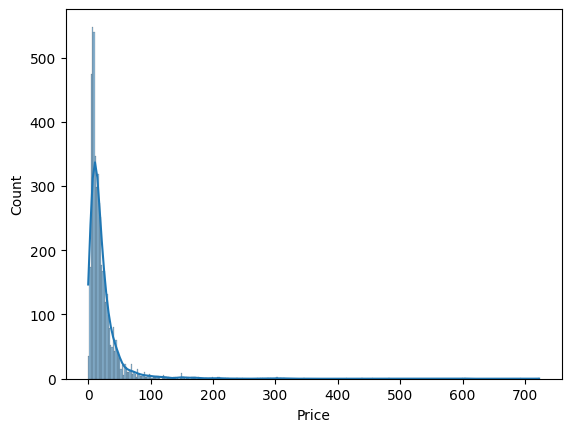

In [70]:
sns.histplot(df['Price'], kde=True)

In [71]:
df[df['Rating'] != 0][['Rating']].describe()

,Rating
count,2194.000000
mean,4.294622
std,0.773311
min,1.000000
25%,4.000000
50%,4.500000
75%,4.800000
max,5.000000


<Axes: ylabel='Frequency'>

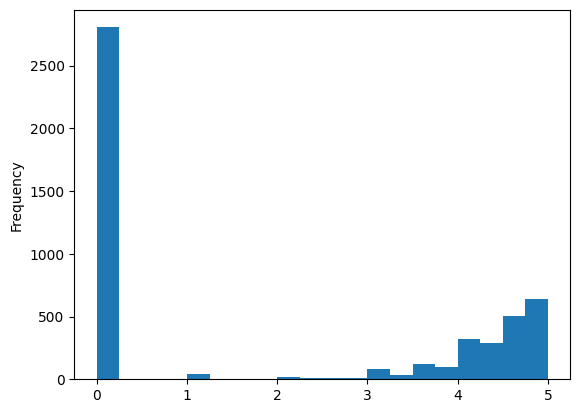

In [72]:
df['Rating'].plot(kind='hist', bins=20)

In [73]:
df[df['ReviewCount'] != 0][['ReviewCount']].describe()

,ReviewCount
count,3346.000000
mean,571.035565
std,2485.699363
min,1.000000
25%,3.000000
50%,20.000000
75%,170.000000
max,29242.000000


alot of zero ratings for items that haven't been rated

<Axes: ylabel='Density'>

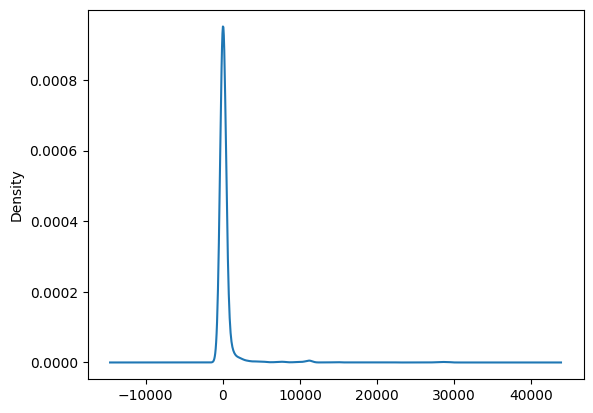

In [74]:
df['ReviewCount'].plot(kind='kde')

# Data Preprocessing

In [75]:
# the last 2 tags are always the same
df['Tags'].apply(lambda x: [tag.strip() for tag in x.split(',')][-2:]).value_counts()

Tags
[Wal-mart, Walmart.com]    5000
Name: count, dtype: int64

In [76]:
# remove the last 2 tags
df['Tags'] = df['Tags'].apply(lambda x: ', '.join([tag.strip() for tag in x.split(',')][:-2]))

In [77]:
# text clean function
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s,]', '', text)
    text = text.lower()
    return text

In [78]:
df['Description'] = df['Description'].apply(clean_text)
df['Tags'] = df['Tags'].apply(clean_text)
df['Category'] = df['Category'].apply(clean_text)

In [79]:
df['ImageURL'] = df['AllImagesURLs'].apply(lambda x: x.split()[0])

In [80]:
df.to_csv('cleaned_products.csv')

# Base Recommendation System

### A Base Recommender Based on Rating and Review Count

In [81]:
def base_recommender(df, num_items=10):
    top_rated = df.sort_values(by=['Rating', 'ReviewCount'], ascending=False)
    top_rated = top_rated.head(num_items)
    return top_rated[['Name', 'Rating', 'ReviewCount', 'Price', 'URL']]

recommended_items = base_recommender(df, num_items=10)
recommended_items

,Name,Rating,ReviewCount,Price,URL
22,"ACT Braces Care Anticavity Mouthwash (18 Oz, C...",5.0,32.0,3.98,https://www.walmart.com/ip/ACT-Braces-Care-Ant...
467,"Versace Man Eau Fraiche Eau De Toilette Spray,...",5.0,24.0,30.00,https://www.walmart.com/ip/Versace-Man-Eau-Fra...
302,Tree Hut Shea Sugar Scrub Passion Fruit & Guav...,5.0,22.0,6.48,https://www.walmart.com/ip/Tree-Hut-Shea-Sugar...
2318,Biolage Hydrasource Conditioning Balm For Dry ...,5.0,21.0,18.99,https://www.walmart.com/ip/Biolage-Hydrasource...
3355,"Ardell Double Up False Eyelashes, 203",5.0,19.0,8.28,https://www.walmart.com/ip/Ardell-Double-Up-Fa...
3376,"Hello Kids Fluoride Free and SLS Free Rinse, N...",5.0,19.0,13.49,https://www.walmart.com/ip/Hello-Kids-Fluoride...
1921,"ReNew Life CleanseMore, Veggie Caps, 60 ea",5.0,15.0,15.55,https://www.walmart.com/ip/ReNew-Life-CleanseM...
149,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,5.0,13.0,73.55,https://www.walmart.com/ip/Clay-Park-Labs-Ammo...
1620,"(2 Pack) Pro Styl Vitamin &quotE&quot Oil, 6 Oz",5.0,13.0,6.83,https://www.walmart.com/ip/2-Pack-Pro-Styl-Vit...
1622,"Gaiam Kids Yoga Mat Pink Zebra, 4mm",5.0,13.0,14.28,https://www.walmart.com/ip/Gaiam-Kids-Yoga-Mat...


Items with fewer reviews often have inflated ratings, while highly reviewed items have more reliable ratings but can be overlooked.

Combining ratings and review counts balances quality (ratings) with popularity (review counts), ensuring fairer recommendations.

A weighted recommender addresses inflated ratings for low-reviewed items and highlights popular, reliable products.

### A Weighted Recommender Based on Rating and Review Count

In [82]:
def weighted_recommender(df):
    df['NormRating'] = df['Rating'] / df['Rating'].max()
    df['NormReview'] = np.log1p(df['ReviewCount']) / np.log1p(df['ReviewCount']).max()
    df['Score'] = (0.9 * df['NormRating'] + 0.1 * df['NormReview'])

    top_items = df.sort_values(by='Score', ascending=False)
    return top_items.head(6)

recommended_items = weighted_recommender(df)
recommended_items[['Name', 'Rating', 'ReviewCount', 'Price', 'Score']]

,Name,Rating,ReviewCount,Price,Score
1153,"Pine-Sol All-Purpose Cleaner, Lemon, 144 oz, B...",4.8,9806.0,23.80,0.953376
4681,"Cascade Platinum ActionPacs, Dishwasher Deterg...",4.8,5388.0,9.93,0.947553
4238,"Pine-Sol Multi-Surface Cleaner, Original, 144 ...",4.7,20997.0,9.78,0.942779
1065,"Gain Original 96 Loads, Liquid Laundry Deterge...",4.8,3175.0,13.44,0.942412
374,Garnier Whole Blends Repairing Shampoo Honey T...,4.7,13809.0,5.47,0.938704
4221,3 Pack - Summers Eve Feminine Cleansing Cloths...,4.9,301.0,17.24,0.937531


# Content-Based Recommendation System

In [83]:
df['CombinedText'] = df['Category'] + ' ' + df['Tags']

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2, 3), stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['CombinedText'])

In [85]:
tfidf_matrix.shape

(5000, 5000)

In [86]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.02808989,
        0.        ],
       [0.        , 1.        , 0.52350205, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52350205, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.03076539],
       [0.02808989, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03076539, 0.        ,
        1.        ]])

In [87]:
def recommend_product(product_index, cosine_sim=cosine_sim, top_n=10):
    sim_scores = list(enumerate(cosine_sim[product_index]))    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    
    product_indices = [x[0] for x in sim_scores]
    similarity_scores = [x[1] for x in sim_scores]
    
    recommended_products = df.iloc[product_indices]
    recommended_products['Similarity'] = similarity_scores
 
    return recommended_products.head(6)

In [88]:
recommended_products = recommend_product(product_index=10)
recommended_products[['Name', 'Rating', 'ReviewCount', 'Price', 'Similarity']]

C:\Users\ahmed_3hijq3m\AppData\Local\Temp\ipykernel_11640\1546348234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_products['Similarity'] = similarity_scores


,Name,Rating,ReviewCount,Price,Similarity
2076,$6 Mail-In Rebate Available Braun Epilator Sil...,4.5,146.0,34.94,0.691674
688,Philips sonicare diamondclean smart 9300 elect...,4.5,758.0,199.95,0.586043
2221,"Oral-B 7000 Smartseries Electric Toothbrush, 3...",4.8,1104.0,219.97,0.562181
2905,Schick Intuition Hello Kitty Advanced Moisture...,3.1,12.0,16.49,0.538710
3399,Gentlemen Republic Grooming Hard Hold & Shine ...,5.0,1.0,42.95,0.237124
4195,GIOVANNI 2chic Ultra Volume Amplifying Hair St...,0.0,0.0,10.15,0.228623
